# Can race and industry be used to predict wage levels in the U.S.? Which factor has more predictive power?

**Objective:**

This project uses machine learning to model how wages vary across racial groups and industries in the United States. The goal was to identify which factors — race or industry — are stronger predictors of wage disparities.



**Methods & Code Snippets:**

Python libraries such as pandas, scikit-learn, and matplotlib were used.

Steps included:


*  Cleaning and restructuring the dataset
*  Creating dummy variables for the categorical predictors, race and industry
*  Fitting a linear regression model and a random forest regressor
*  Evaluating performance using MAE, RMSE, and R²
*  Visualizing predicted vs. actual values and feature importance (for Random Forest)


In [ ]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# ------------------------
# LOAD & PREPROCESS DATA
# ------------------------

# Load wage/race dataset
df = pd.read_excel("/content/Project Data/Wage_by_Race_and_Industry_CLEANED.xlsx")

# Preview columns
print("Columns:\n", df.columns)
print("Preview:\n", df.head())

# Drop rows with missing values in key columns
df = df[["Wage", "Race", "Industry"]].dropna()

# Convert to dummy variables for categorical features
df_model = pd.get_dummies(df, columns=["Race", "Industry"], drop_first=True)


Columns:
 Index(['Industry', 'Race', 'Wage'], dtype='object')
Preview:
                                         Industry         Race   Wage
0     Agriculture, Forestry, Fishing and Hunting  White Alone   3889
1  Mining, Quarrying, and Oil and Gas Extraction  White Alone   6789
2                                      Utilities  White Alone  14477
3                                   Construction  White Alone   7255
4                                  Manufacturing  White Alone   7875


**Data Sources:**

Data was collected from U.S. Census [QWI Explorer](https://https://qwiexplorer.ces.census.gov/), a web-based analysis tool that enables access to the full Quarterly Workforce Indicators (QWI) dataset. summarizing average annual wages by race and industry (NAICS Sectors) from 2024 Q1. The dataset was reshaped from wide to long format, changing the columns to "Industry", "Race", and "Wage". Then stored as a new [Excel file](https://docs.google.com/spreadsheets/d/e/2PACX-1vSFi1D0weHpbR3eLUXKyEXKpQCg9CAQQ2LPeC1JJHr4_8Y3urRjJ4vUt0-6HEHWWg/pubhtml).

In [ ]:
# ------------------------
# TRAIN/TEST SPLIT
# ------------------------

X = df_model.drop("Wage", axis=1)
y = df_model["Wage"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Training models...

Linear Regression Results:
MAE: 1703.92, RMSE: 3105.28, R²: 0.84


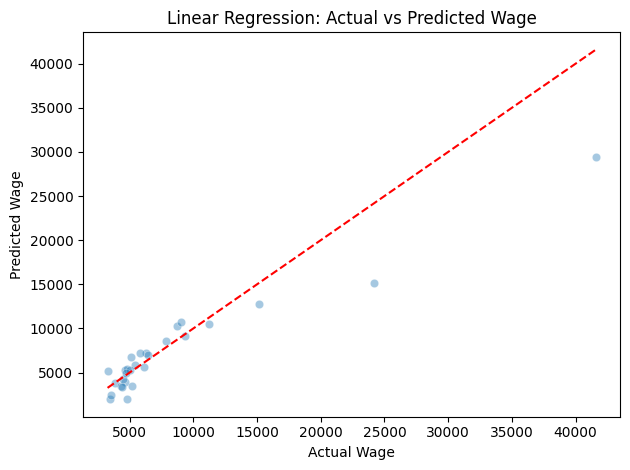


Random Forest Results:
MAE: 2222.18, RMSE: 4780.55, R²: 0.62


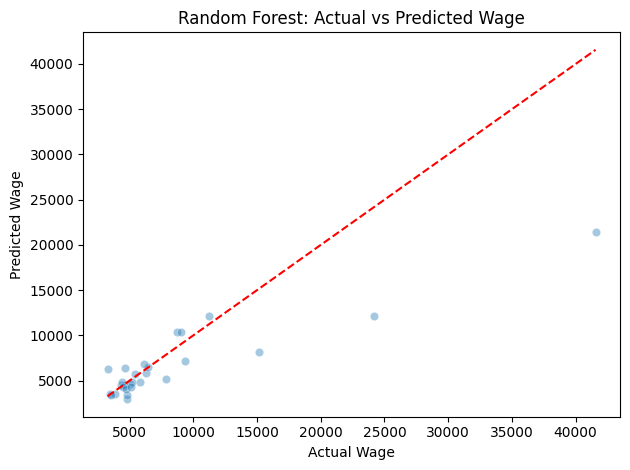

In [ ]:
# ------------------------
# TRAIN MODELS & EVALUATE
# ------------------------

print("Training models...")
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}

    print(f"\n{name} Results:")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

    # Scatter plot: actual vs predicted
    plt.figure()
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.xlabel("Actual Wage")
    plt.ylabel("Predicted Wage")
    plt.title(f"{name}: Actual vs Predicted Wage")
    plt.tight_layout()
    plt.show()


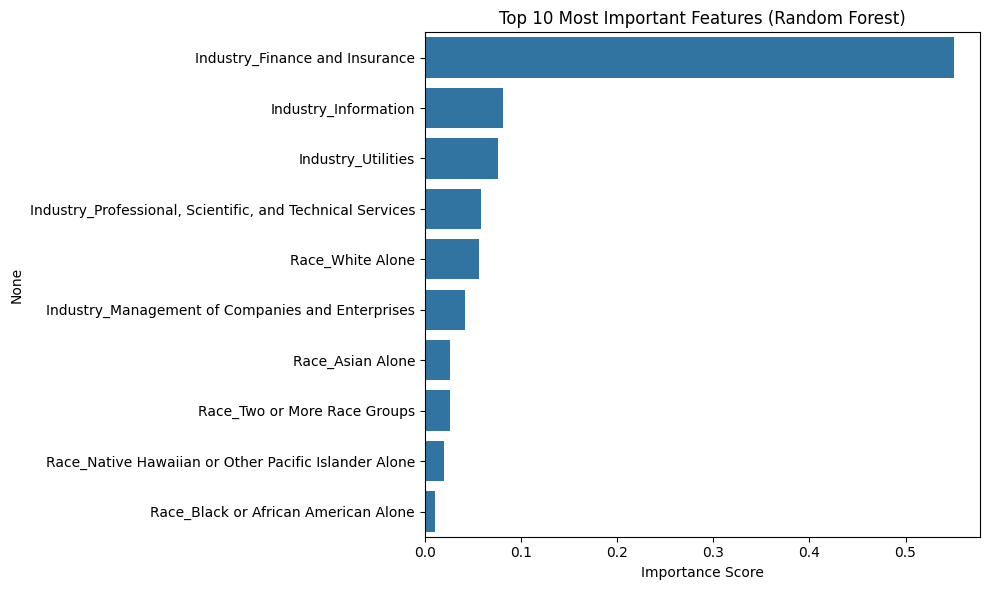

In [ ]:
# ------------------------
# FEATURE IMPORTANCE (RANDOM FOREST ONLY)
# ------------------------

rf_model = models["Random Forest"]
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:10], y=importances.index[:10])
plt.title("Top 10 Most Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

**Key Insights/Results:**

* The linear regression model achieved an R² of 0.84, indicating that race and industry together explain a significant portion of wage variation.
* Random forest performed worse, with an R² of 0.62 and a higher error.
* MAE of 1,700 – 2,200. On average, predictions were off by 1,700 - 2,200 dollars.
* Industry variables were the most influential predictors of wage.
* Race variables had smaller, but still measurable, predictive power.



Reflection of Results:

I did not begin with a fixed hypothesis about how race and industry interact to influence wages. I used the model to uncover which variables were most predictive.

The most consistent pattern that emerged was that industry type had a stronger influence on predicted wages than race. Industries such as Finance and Insurance, Information, and Utilities were associated with the highest predicted wages across racial groups, while industries like Agriculture and Accommodation and Food Services consistently predicted lower wages. Race still contributed to wage variation, however to a lesser degree.

While the model revealed some clear patterns, the lack of additional variables (possibly education, experience, or location) limited its ability to explain wage differences. Including those factors would have likely made the results more complete and the patterns more reliable, hopefully lowering the Mean Absolute Error (MAE).